In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("daily-min-temperatures.csv")

In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df['Month'] = df['Date'].dt.month

In [5]:
monthly_avg_temp = df.groupby('Month')['Temp'].mean().reset_index()

In [6]:
# Define features and target variable
X = monthly_avg_temp[['Month']]
y = monthly_avg_temp['Temp']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-Squared: {r2:.2f}")

MSE: 6.22
MAE: 2.27
R-Squared: -0.67


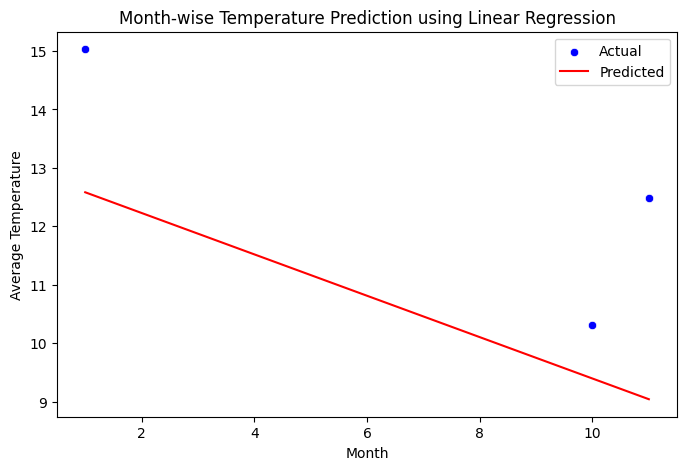

In [12]:
# Visualization
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['Month'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['Month'], y=y_pred, color='red', label='Predicted')
plt.xlabel("Month")
plt.ylabel("Average Temperature")
plt.title("Month-wise Temperature Prediction using Linear Regression")
plt.legend()
plt.show()